Edge Weights: {(0, 1): 9.389275044452676, (0, 2): 9.89432866872518, (0, 5): 6.563385306665252, (0, 14): 5.840735064496727, (0, 16): 9.800860509899863, (1, 3): 6.076834203330108, (1, 9): 4.492129561833437, (1, 14): 3.7728618772429803, (1, 16): 7.508838659195948, (2, 5): 3.9116199783317356, (2, 6): 3.1528652036055407, (2, 15): 3.123378806537337, (3, 4): 3.5703232136974483, (3, 5): 8.008375500752866, (3, 9): 4.925157741953269, (3, 11): 5.889269384694671, (4, 8): 8.267059904134781, (4, 9): 7.524771693793836, (4, 11): 6.853055188413208, (4, 13): 4.269678117563893, (4, 14): 7.225400826096418, (5, 12): 3.2067577816498387, (5, 15): 9.768173668778434, (5, 16): 8.727783570438072, (6, 8): 5.797191238240583, (6, 10): 7.811788015836278, (6, 15): 9.390176811101043, (7, 8): 9.226266081937835, (7, 13): 1.7396343533179786, (7, 16): 4.15784705948993, (7, 17): 1.0213167486339414, (8, 9): 7.164094875771894, (8, 12): 6.612657335213805, (8, 15): 3.1830474858664486, (8, 16): 6.171012271974895, (9, 13): 9.777

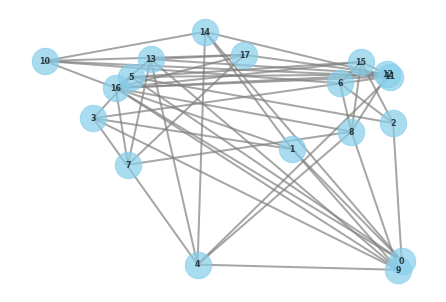

brute_force 199.2326473140973 [8, 9, 12, 13, 15, 16, 17] 0.48891448974609375
vns1 199.23264731409736 [8, 17, 16, 15, 9, 13, 12] 65257
vns2 196.40558828466396 [0, 17, 16, 15, 13, 12, 5] 29012
vns+simulated_annealing 199.23264731409733 [8, 9, 16, 12, 17, 15, 13] 64149
vns+local_search 199.2326473140974 [8, 15, 9, 12, 16, 13, 17] 6737
greedy 167.41654882634822 [16, 8, 15, 0, 9, 5, 4] 
vns+local_search+greedy 199.23264731409736 [16, 17, 8, 13, 12, 9, 15] 5958


In [6]:
%run nx_algorithms.ipynb
import networkx as nx
from matplotlib import pyplot as plt

def test_all_algorithms(k, n, l, vns_time, test_bf = False):
    
    graph = nx.Graph()
    
    for i in range(n):
        graph.add_node(i, x=random.uniform(0, 10), y=random.uniform(0, 10))
    
    for u in graph.nodes:
        for v in range(u + 1, len(graph.nodes)):
            if random.choice([True, False, False]):  
                weight = random.uniform(1, 10)  
                graph.add_edge(u, v, weight=weight)
    
    edge_weights = nx.get_edge_attributes(graph, 'weight')
    print("Edge Weights:", edge_weights)

    pos = {node: (graph.nodes[node]['x'], graph.nodes[node]['y']) for node in graph.nodes}
    
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=8, edge_color='gray', width=2, alpha=0.7)
   
    plt.show()
    
    subgraph = random.sample(range(n), k)
    
    if test_bf:
        solution1, value1, time = brute_force_max_edge_subgraph(graph, k)
    else:
        value1 = "Too complex!"
        solution1 = "-"
        time = "-"
        
    solution2, value2, iter2 = vns1(subgraph, graph, l, vns_time, 0.5)
    solution3, value3, iter3 = vns2(subgraph, graph, l, vns_time, 0.5)
    solution4, value4, iter4 = vns3(subgraph, graph, l, vns_time, 0.5)
    solution5, value5, iter5 = vns4(subgraph, graph, l, vns_time, 0.5)
    solution6, value6 = greedy(graph, len(subgraph))
    solution7, value7, iter7 = vns4(solution6, graph, l, vns_time, 0.5)
    
    values = [value1, value2, value3, value4, value5, value6, value7]
    solutions = [solution1, solution2, solution3, solution4, solution5, solution6, solution7]
    times_iters = [time, iter2, iter3, iter4, iter5, "", iter7]

    algorithm_names = ["brute_force", "vns1", "vns2", "vns+simulated_annealing", "vns+local_search", "greedy", "vns+local_search+greedy"]

    for i in range(len(values)):
        print(algorithm_names[i], values[i], solutions[i], times_iters[i])
    
test_all_algorithms(7,18, 3,2,True
                   )